In [2]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("../Data/USArrests.csv").copy()
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
df.index = df.iloc[:,0]

In [5]:
df.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='Unnamed: 0')

In [6]:
df = df.iloc[:,1:5]

In [7]:
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


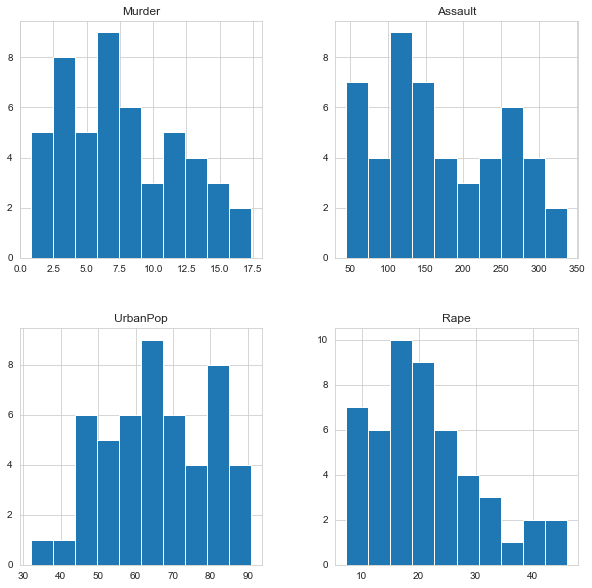

In [10]:
df.hist(figsize = (10,10));

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans

KMeans(n_clusters=4)

In [12]:
k_fit = kmeans.fit(df)

In [13]:
k_fit.n_clusters

4

In [14]:
k_fit.cluster_centers_

array([[  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ]])

In [15]:
k_fit.labels_

array([2, 2, 2, 1, 2, 1, 3, 2, 2, 1, 0, 3, 2, 3, 0, 3, 3, 2, 0, 2, 1, 2,
       0, 2, 1, 3, 3, 2, 0, 1, 2, 2, 2, 0, 3, 1, 1, 3, 1, 2, 0, 1, 1, 3,
       0, 1, 1, 0, 0, 1])

In [16]:
kmeans = KMeans(n_clusters = 2)
k_fit = kmeans.fit(df)

In [17]:
clusters = k_fit.labels_

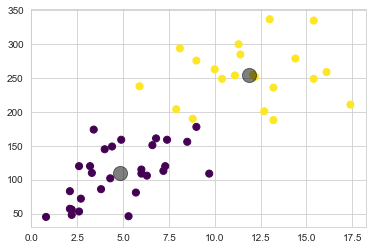

In [18]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, s = 50, cmap = "viridis")

centers = k_fit.cluster_centers_

plt.scatter(centers[:,0], centers[:,1], c = "black", s = 200, alpha = 0.5);

In [19]:
from mpl_toolkits.mplot3d import Axes3D

In [20]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
clusters = k_fit.labels_
centers = kmeans.cluster_centers_

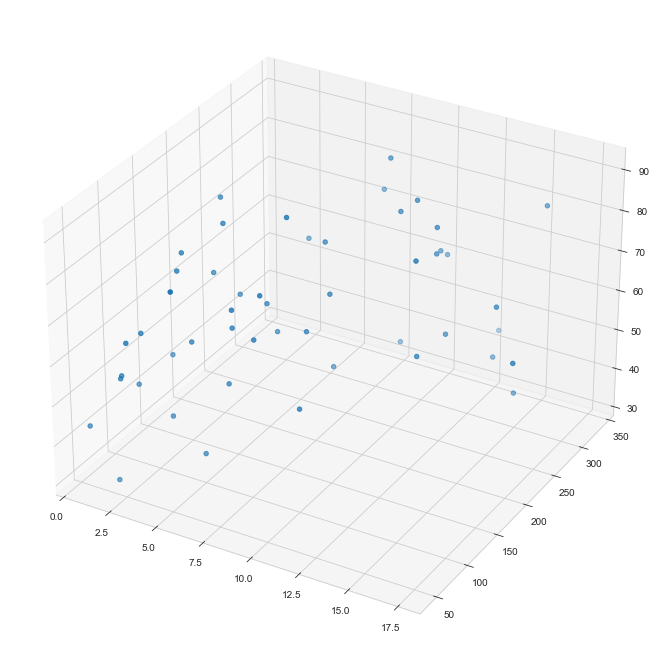

In [21]:
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2]);

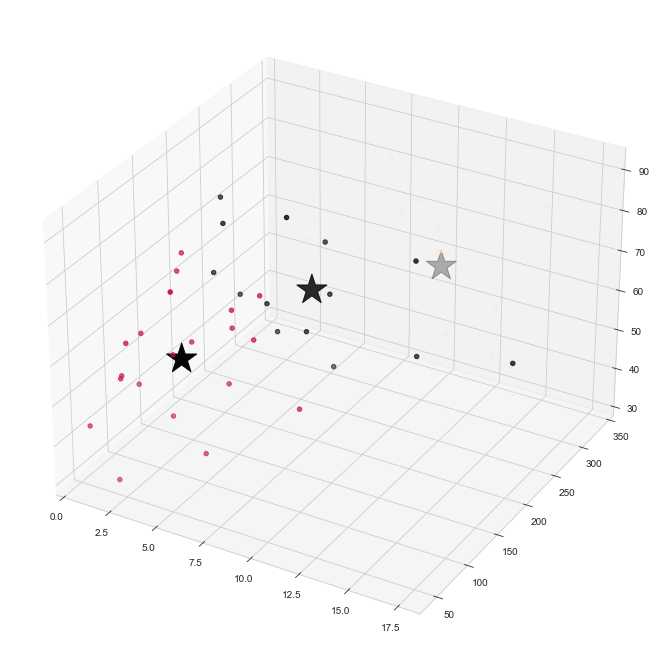

In [22]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=clusters)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2],
           marker='*',
           c='#050505',
           s=1000);

In [23]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
clusters = k_fit.labels_

In [24]:
pd.DataFrame({"States" : df.index, "Clusters": clusters})[0:10]

,States,Clusters
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,0
4,California,1
5,Colorado,0
6,Connecticut,2
7,Delaware,1
8,Florida,1
9,Georgia,0


In [25]:
df["Cluster_No"] = clusters

In [26]:

df.head()

,Murder,Assault,UrbanPop,Rape,Cluster_No
Unnamed: 0,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,1


In [27]:
df["Cluster_No"] = df["Cluster_No"] + 1

In [28]:
df

,Murder,Assault,UrbanPop,Rape,Cluster_No
Unnamed: 0,,,,,
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,2
Colorado,7.9,204,78,38.7,1
Connecticut,3.3,110,77,11.1,3
Delaware,5.9,238,72,15.8,2
Florida,15.4,335,80,31.9,2


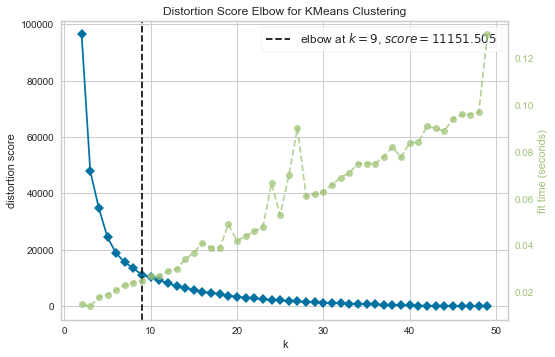

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,50))
visualizer.fit(df)
visualizer.poof()

In [32]:
kmeans = KMeans(n_clusters = 9)
k_fit = kmeans.fit(df)
clusters = k_fit.labels_

In [33]:
pd.DataFrame({"States" : df.index, "Clusters": clusters})[0:10]

,States,Clusters
0,Alabama,7
1,Alaska,3
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,4
7,Delaware,7
8,Florida,6
9,Georgia,2
